# Time Series Analysis on IoT Data

## Introduction

This Data is collected from **IIIT-Hyd's Air Pollution Monitoring Sensor Nodes**. Five IoT enabled low-cost sensor nodes monitoring **Temperature**, **Humidity**, and **Particulate Matter(PM)**, one of the dominant pollutants are deployed in the IIITH Campus.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.cluster import DBSCAN

In [3]:
n1_avg = pd.read_csv("Node9/adata.csv")
n2_avg = pd.read_csv("Node3/adata.csv")
n3_avg = pd.read_csv("Node5/adata.csv")
n4_avg = pd.read_csv("Node7/adata.csv")
n5_avg = pd.read_csv("Node8/adata.csv")

In [10]:
n3_avg.dropna(inplace=True)

In [4]:
n1_avg['created_at'] = pd.to_datetime(n1_avg.created_at)
n2_avg['created_at'] = pd.to_datetime(n2_avg.created_at)
n3_avg['created_at'] = pd.to_datetime(n3_avg.created_at)
n4_avg['created_at'] = pd.to_datetime(n4_avg.created_at)
n5_avg['created_at'] = pd.to_datetime(n5_avg.created_at)

In [5]:
n1_avg.sort_values(by='created_at', inplace=True)
n2_avg.sort_values(by='created_at', inplace=True)
n3_avg.sort_values(by='created_at', inplace=True)
n4_avg.sort_values(by='created_at', inplace=True)
n5_avg.sort_values(by='created_at', inplace=True)

In [6]:
n1_avg.set_index(['created_at'], inplace=True)
n2_avg.set_index(['created_at'], inplace=True)
n3_avg.set_index(['created_at'], inplace=True)
n4_avg.set_index(['created_at'], inplace=True)
n5_avg.set_index(['created_at'], inplace=True)

## Outlier Detection

Detection the outliers in the recording of particular matter by the nodes using the DBSCAN algorithm.

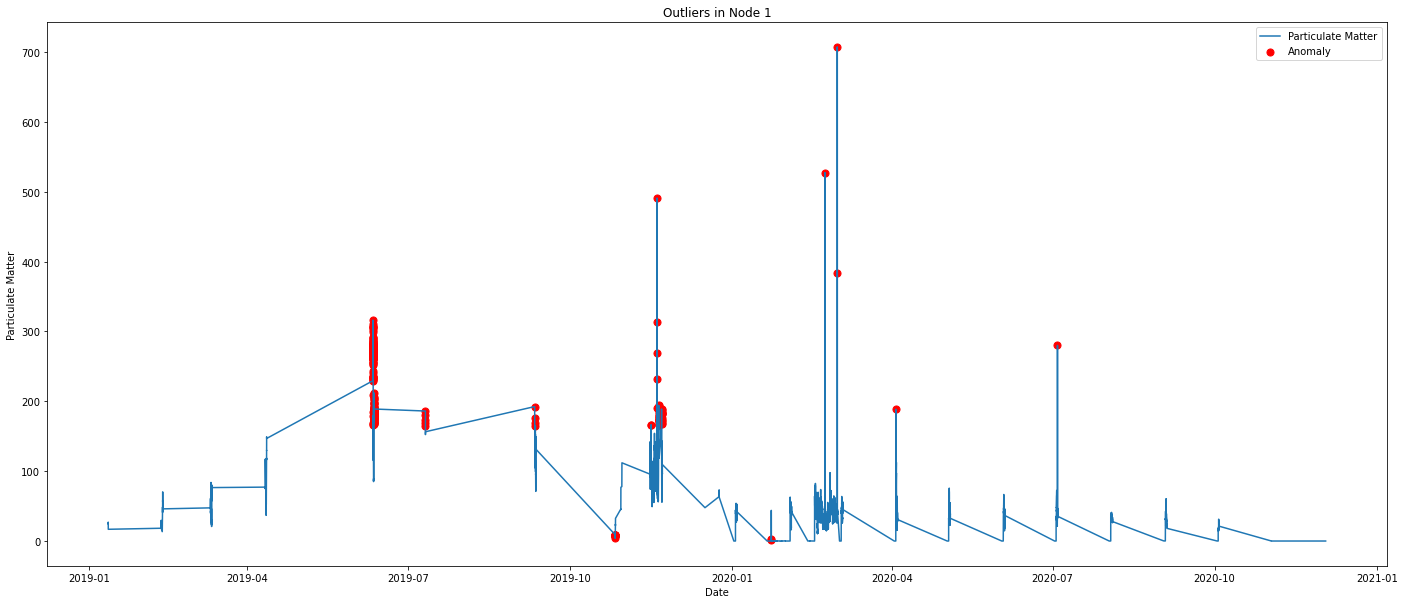

In [7]:
clustering = DBSCAN(eps=1.1, min_samples=5).fit(n1_avg[['p10']])
n1_avg["cluster"] = clustering.labels_
n1_avg["cluster"].value_counts()

fig, ax = plt.subplots(figsize=(24,10))

a = n1_avg[(n1_avg['cluster'] != 10) & (n1_avg['cluster'] !=0)].index
b= n1_avg[(n1_avg['cluster'] != 10) & (n1_avg['cluster'] != 0)]['p10']

ax.plot(n1_avg.index, n1_avg.p10, label='Particulate Matter')
ax.scatter(a, b, color='red', label='Anomaly',s = 50)
plt.xlabel('Date')
plt.ylabel('Particulate Matter')
plt.legend()
plt.title("Outliers in Node 1")
plt.show()

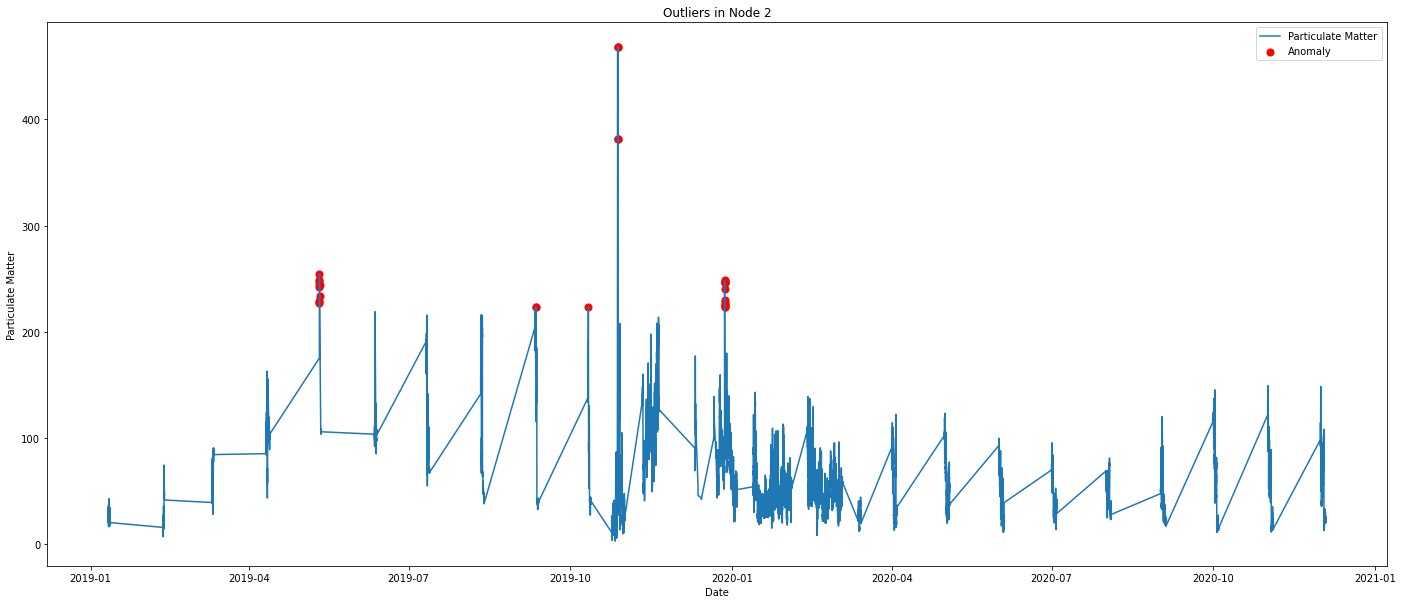

In [8]:
clustering = DBSCAN(eps=1.1, min_samples=5).fit(n2_avg[['p10']])
n2_avg["cluster"] = clustering.labels_
n2_avg["cluster"].value_counts()

fig, ax = plt.subplots(figsize=(24,10))

a = n2_avg[(n2_avg['cluster'] != 0)].index
b= n2_avg[(n2_avg['cluster'] != 0)]['p10']

ax.plot(n2_avg.index, n2_avg.p10, label='Particulate Matter')
ax.scatter(a, b, color='red', label='Anomaly',s = 50)
plt.xlabel('Date')
plt.ylabel('Particulate Matter')
plt.legend()
plt.title("Outliers in Node 2")
plt.show()

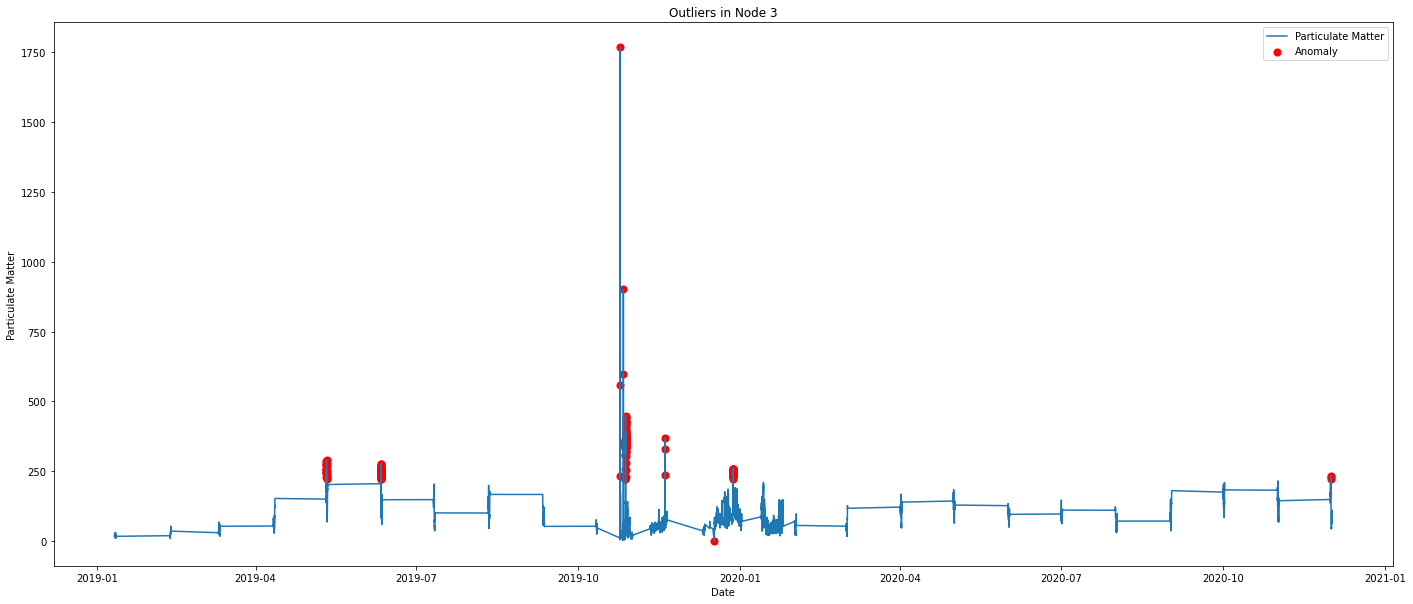

In [11]:
clustering = DBSCAN(eps=1.1, min_samples=5).fit(n3_avg[['p10']])
n3_avg["cluster"] = clustering.labels_
n3_avg["cluster"].value_counts()

fig, ax = plt.subplots(figsize=(24,10))

a = n3_avg[(n3_avg['cluster'] != 0)].index
b= n3_avg[(n3_avg['cluster'] != 0)]['p10']

ax.plot(n3_avg.index, n3_avg.p10, label='Particulate Matter')
ax.scatter(a, b, color='red', label='Anomaly',s = 50)
plt.xlabel('Date')
plt.ylabel('Particulate Matter')
plt.legend()
plt.title("Outliers in Node 3")
plt.show()

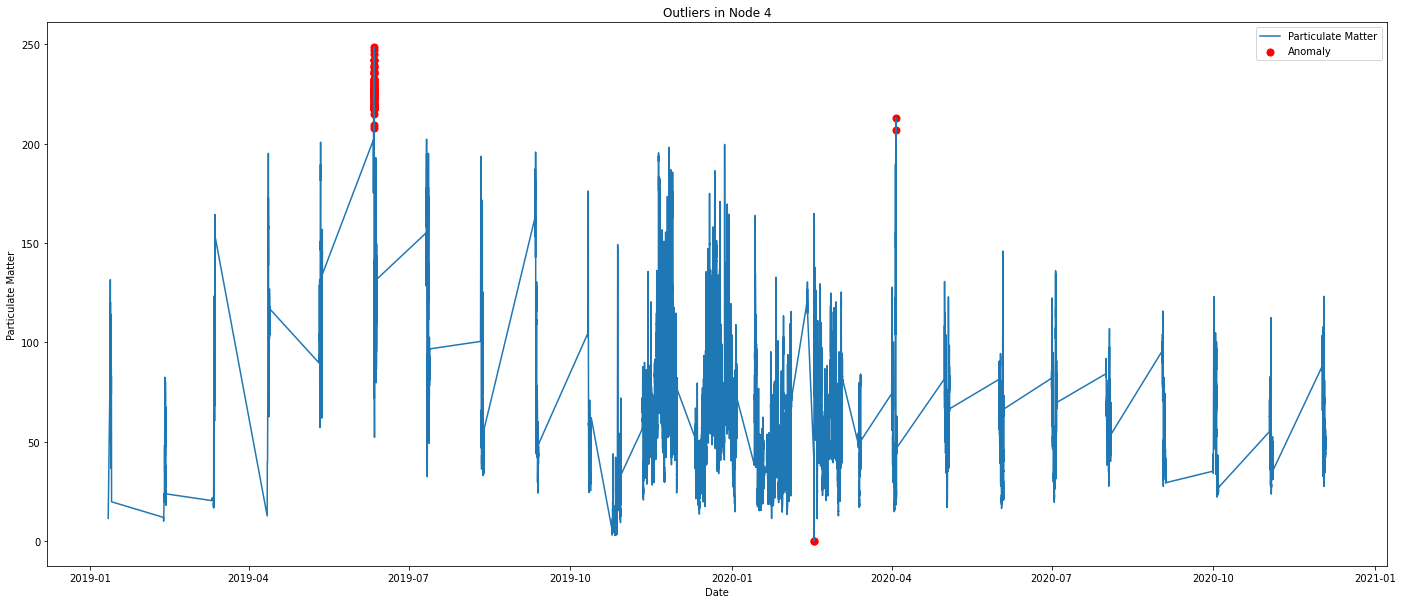

In [12]:
clustering = DBSCAN(eps=1.1, min_samples=5).fit(n4_avg[['p10']])
n4_avg["cluster"] = clustering.labels_
n4_avg["cluster"].value_counts()

fig, ax = plt.subplots(figsize=(24,10))

a = n4_avg[(n4_avg['cluster'] != 0)].index
b= n4_avg[(n4_avg['cluster'] != 0)]['p10']

ax.plot(n4_avg.index, n4_avg.p10, label='Particulate Matter')
ax.scatter(a, b, color='red', label='Anomaly',s = 50)
plt.xlabel('Date')
plt.ylabel('Particulate Matter')
plt.legend()
plt.title("Outliers in Node 4")
plt.show()

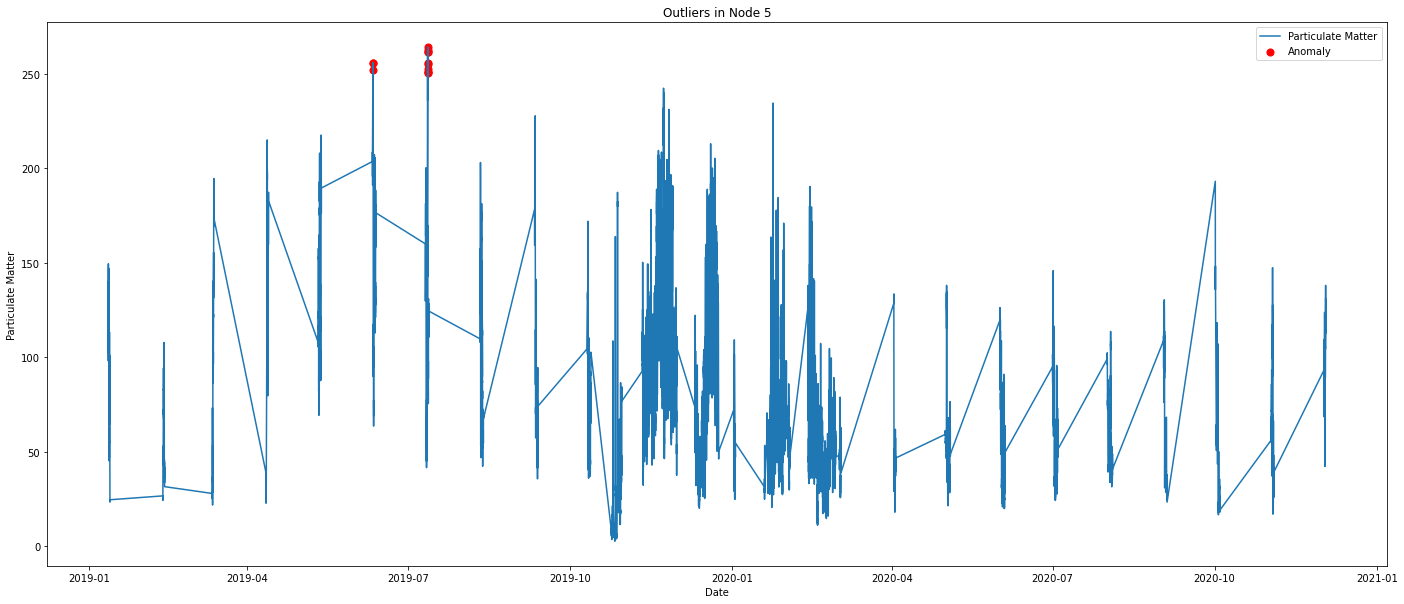

In [13]:
clustering = DBSCAN(eps=1.1, min_samples=5).fit(n5_avg[['p10']])
n5_avg["cluster"] = clustering.labels_
n5_avg["cluster"].value_counts()

fig, ax = plt.subplots(figsize=(24,10))

a = n5_avg[(n5_avg['cluster'] != 0)].index
b= n5_avg[(n5_avg['cluster'] != 0)]['p10']

ax.plot(n5_avg.index, n5_avg.p10, label='Particulate Matter')
ax.scatter(a, b, color='red', label='Anomaly',s = 50)
plt.xlabel('Date')
plt.ylabel('Particulate Matter')
plt.legend()
plt.title("Outliers in Node 5")
plt.show()

## Time Series Forecasting

#### Visualizing the data

In [28]:
n1 = n1_avg.loc['2020-02-20' : '2020-03-01 00:00:00']
n2 = n2_avg.loc['2020-02-20' : '2020-03-01 00:00:00']
n4 = n4_avg.loc['2020-02-20' : '2020-03-01 00:00:00']
n5 = n5_avg.loc['2020-02-20' : '2020-03-01 00:00:00']

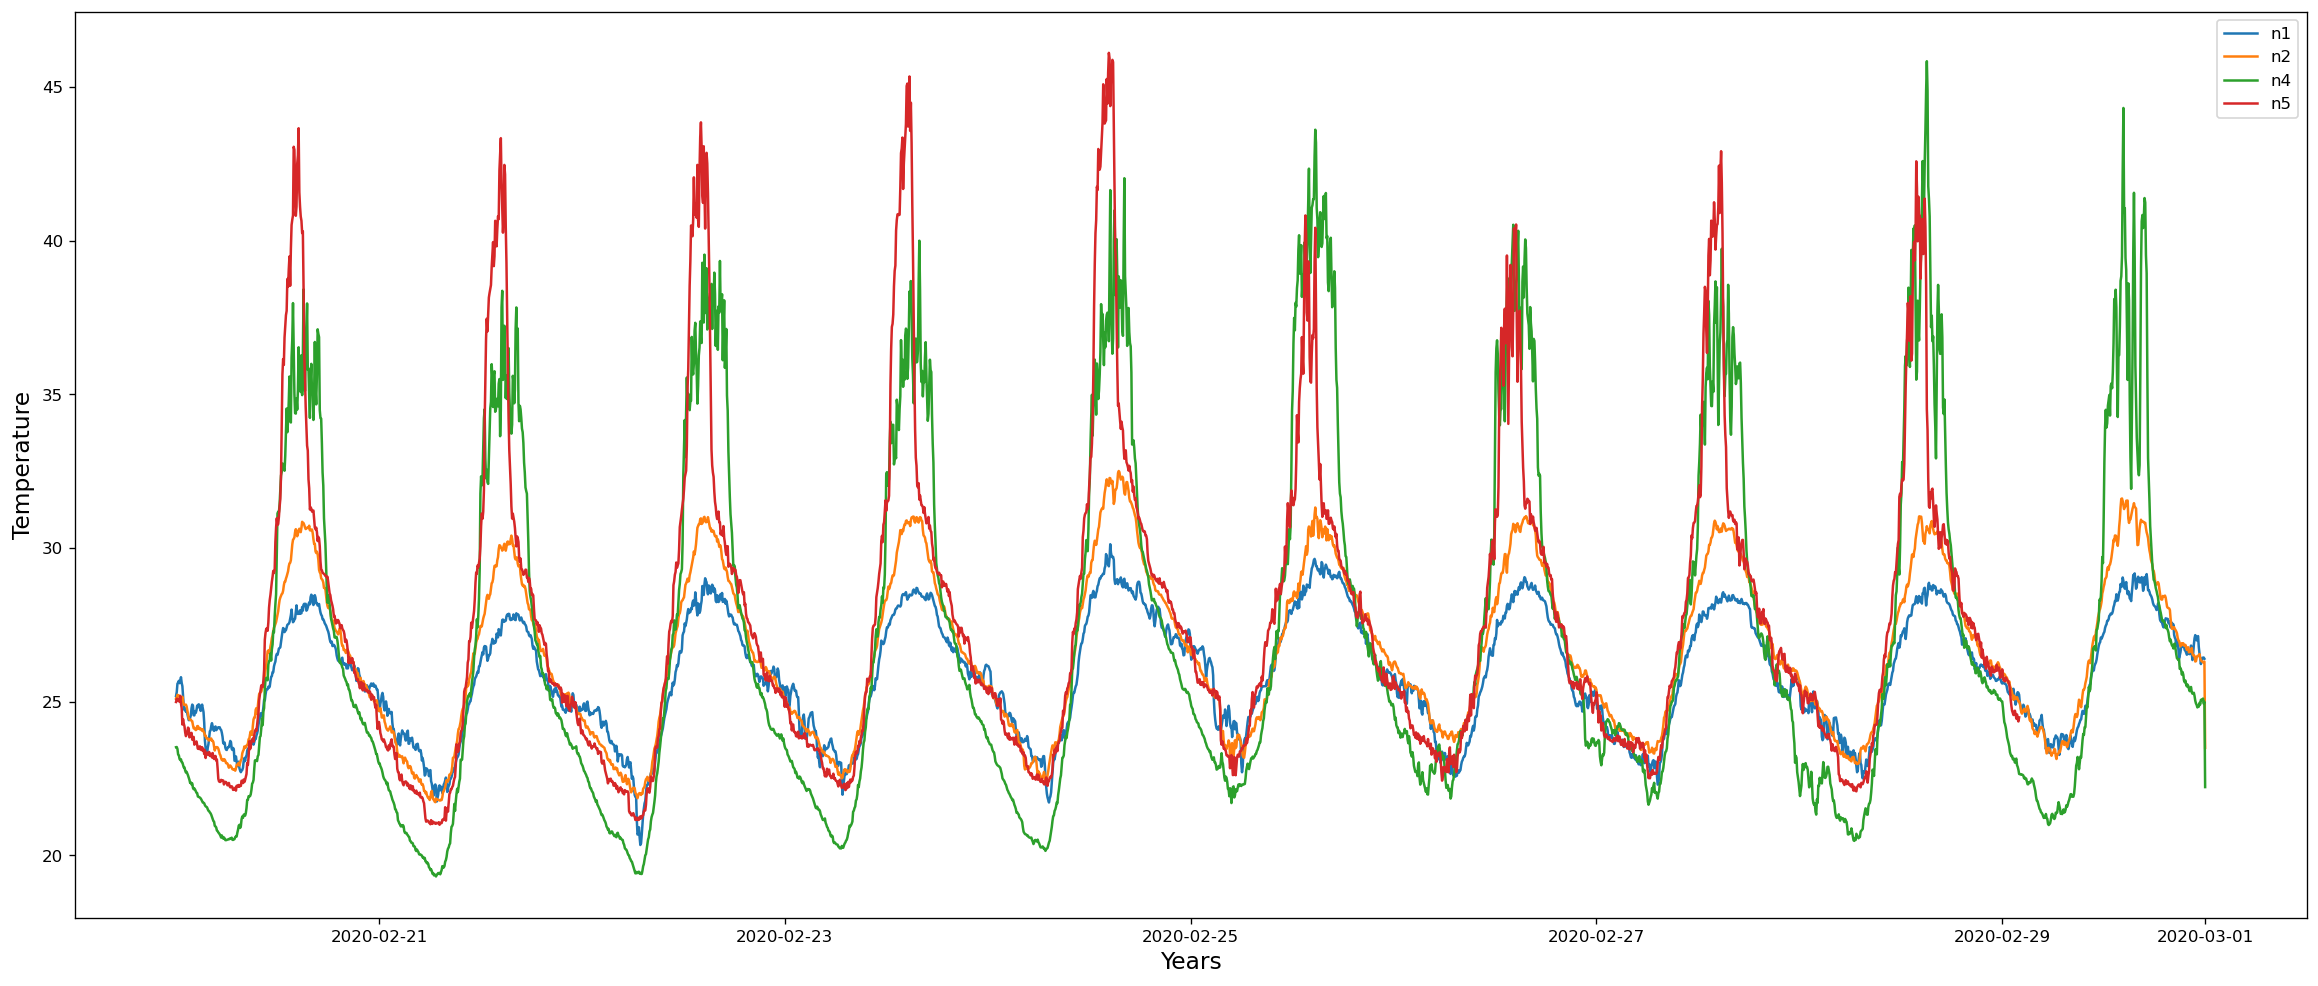

In [29]:
plt.figure(figsize=(24, 10), dpi=120)

plt.plot(n1['temp'], label = 'n1')
plt.plot(n2['temp'], label = 'n2')
plt.plot(n4['temp'], label = 'n4')
plt.plot(n5['temp'], label = 'n5')
plt.legend()
plt.xlabel('Years', fontsize=14)
plt.ylabel('Temperature', fontsize=14)
plt.show()

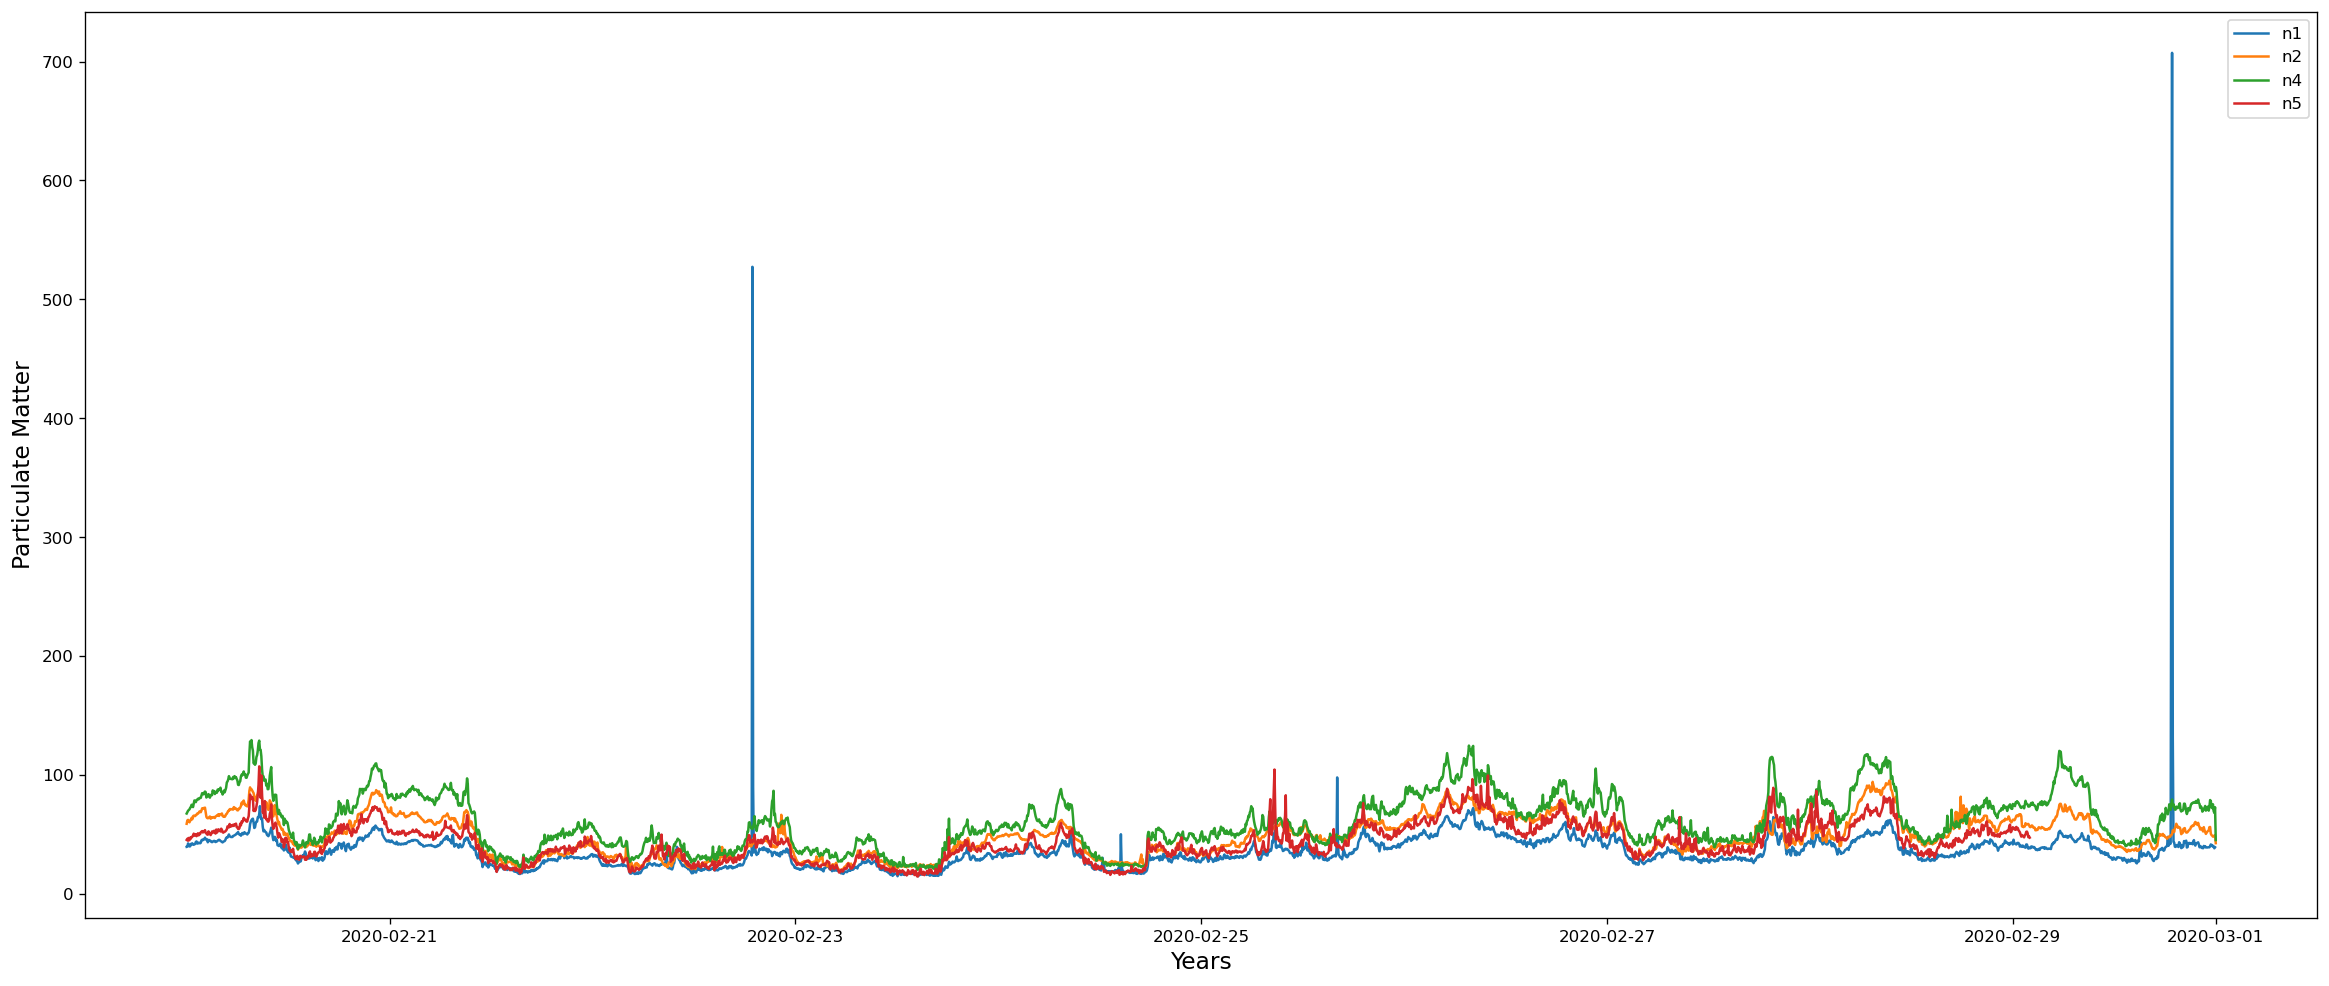

In [30]:
plt.figure(figsize=(24, 10), dpi=120)

plt.plot(n1['p10'], label = 'n1')
plt.plot(n2['p10'], label = 'n2')
plt.plot(n4['p10'], label = 'n4')
plt.plot(n5['p10'], label = 'n5')
plt.legend()
plt.xlabel('Years', fontsize=14)
plt.ylabel('Particulate Matter', fontsize=14)
plt.show()

#### Split the data

In [31]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])

    return np.array(dataX), np.array(dataY)

In [32]:
train = n1[:"2020-02-27 00:00:00"]
test = n1["2020-02-27 00:00:01":]

def split(df, col):

    train_values = train[col].values.reshape(-1,1).astype('float32')
    test_values = test[col].values.reshape(-1,1).astype('float32')
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_scaled = scaler.fit_transform(train_values)
    test_scaled = scaler.transform(test_values)

    look_back = 1
    trainX, trainY = create_dataset(train_scaled, look_back)
    testX, testY = create_dataset(test_scaled, look_back)

    trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

    return trainX, trainY, testX, testY, scaler

In [33]:
trainX_temp, trainY_temp, testX_temp, testY_temp, temp_scaler = split(n1, 'temp')
trainX_p10, trainY_p10, testX_p10, testY_p10, p10_scaler = split(n1, 'p10')
trainX_hum, trainY_hum, testX_hum, testY_hum, hum_scaler = split(n1, 'hum')

#### Train the LSTM Model

In [20]:
def training(trainX, trainY, testX, testY):
    model = Sequential()
    model.add(LSTM(100, input_shape=(trainX.shape[1], trainX.shape[2])))
    model.add(Dense(1))
    model.compile(loss='mae', optimizer='adam')
    history = model.fit(trainX, trainY, epochs=20, batch_size=100, validation_data=(testX, testY), shuffle=False, verbose=0)

    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()
    plt.show()
    return model

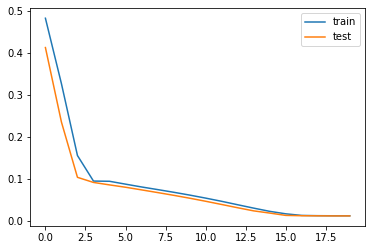

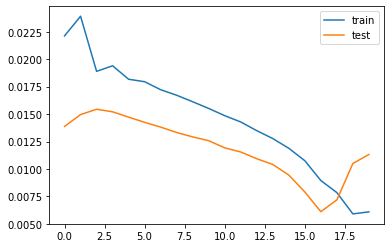

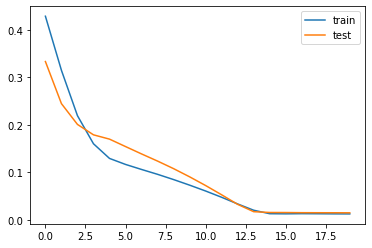

In [21]:
model_temp = training(trainX_temp, trainY_temp, testX_temp, testY_temp)
model_p10 = training(trainX_p10, trainY_p10, testX_p10, testY_p10)
model_hum = training(trainX_hum, trainY_hum, testX_hum, testY_hum)

#### Prediction

In [22]:
def prediction(testX, testY, scaler):
    yhat = model_temp.predict(testX)
    yhat_inverse = scaler.inverse_transform(yhat.reshape(-1, 1))
    testY_inverse = scaler.inverse_transform(testY.reshape(-1, 1))
    predicted = np.vstack((yhat_inverse, yhat_inverse[-1]))
    return predicted

In [23]:
pred = test.copy()
pred.temp = prediction(testX_temp, testY_temp, temp_scaler)
pred.p10 = prediction(testX_p10, testY_p10, p10_scaler)
pred.hum = prediction(testX_hum, testY_hum, hum_scaler)

27/27 [==============================] - 0s 808us/step


#### Plotting the Prediction

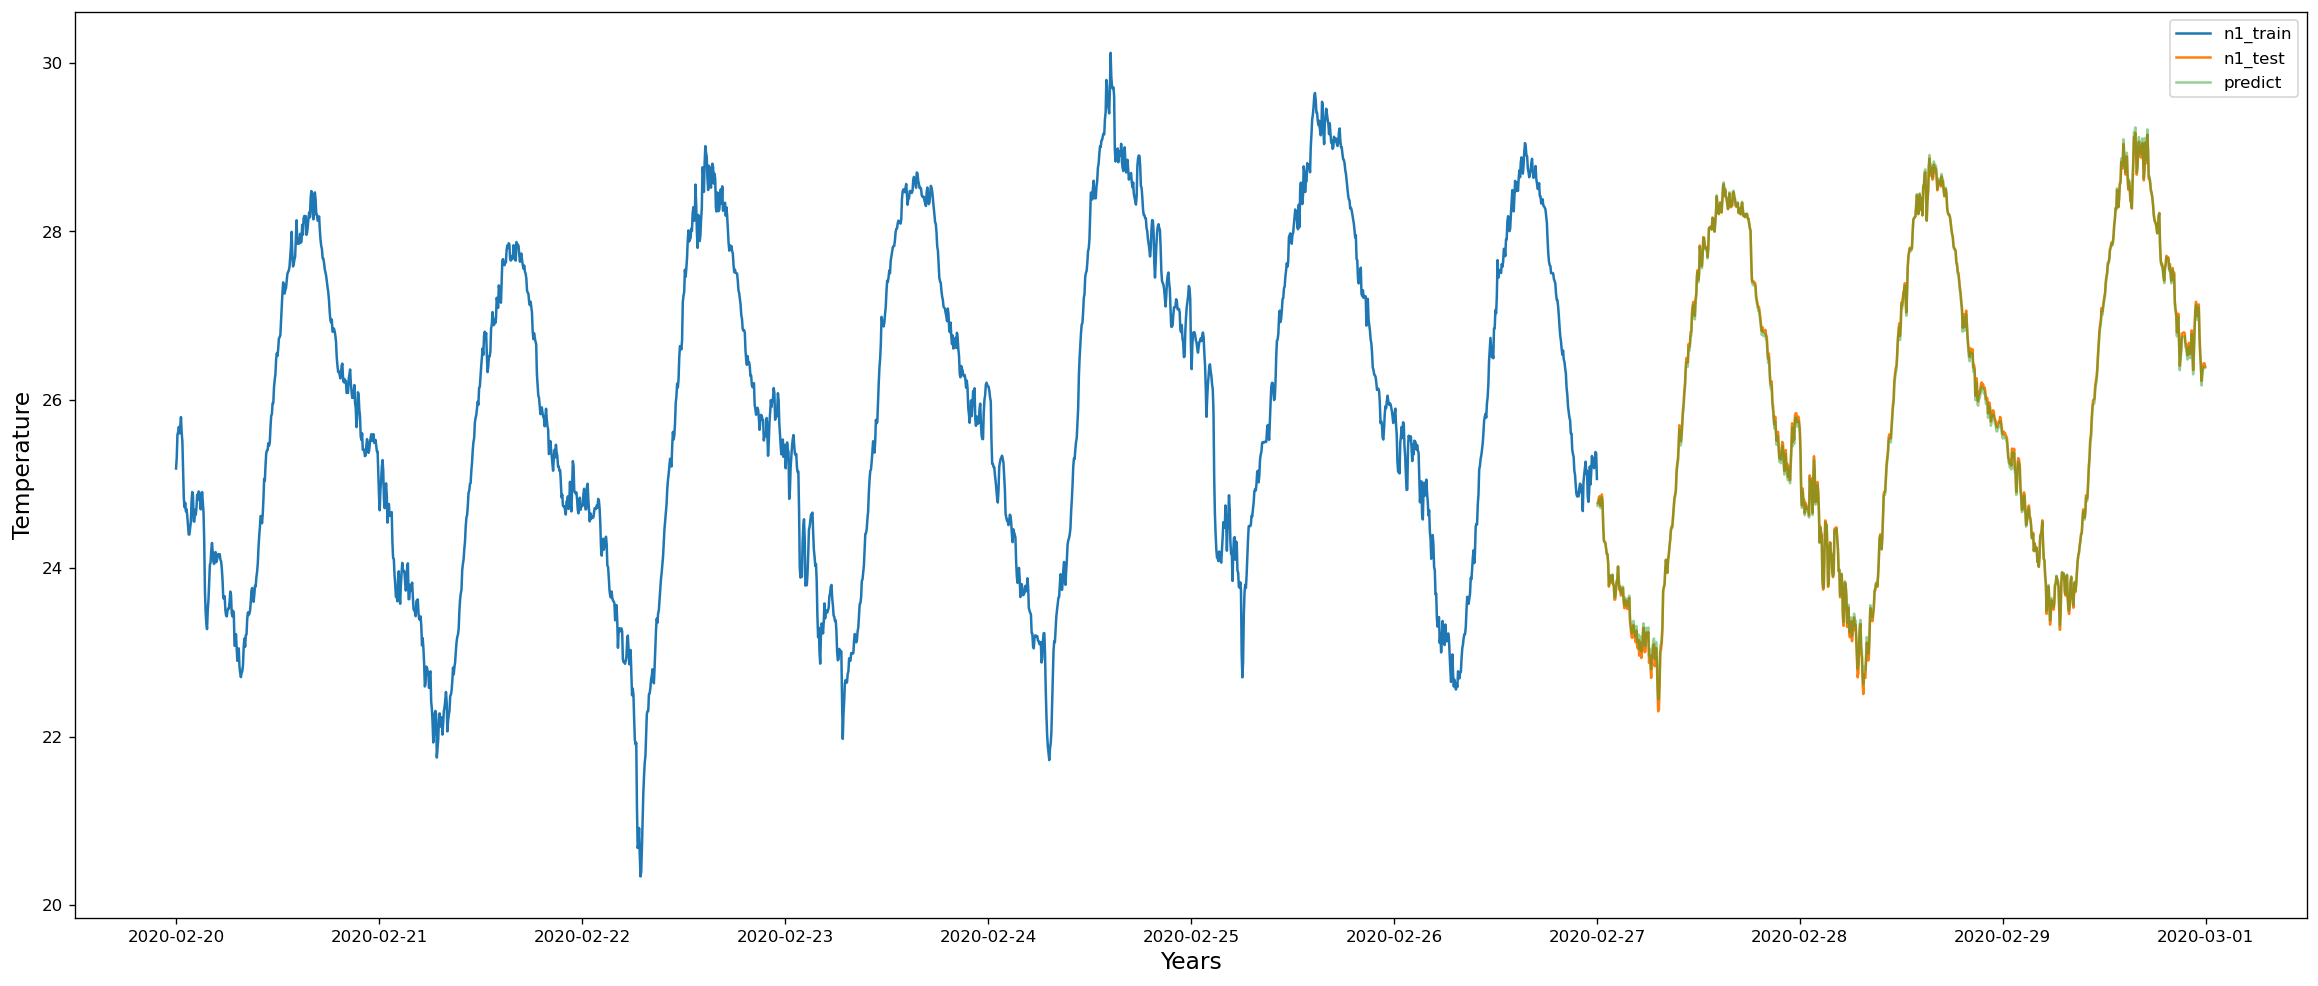

In [34]:
plt.figure(figsize=(24, 10), dpi=120)
plt.plot(train['temp'], label = 'n1_train')
plt.plot(test['temp'], label = 'n1_test')
plt.plot(pred['temp'], label='predict', alpha = 0.5)
plt.legend()
plt.xlabel('Years', fontsize=14)
plt.ylabel('Temperature', fontsize=14)
plt.show()

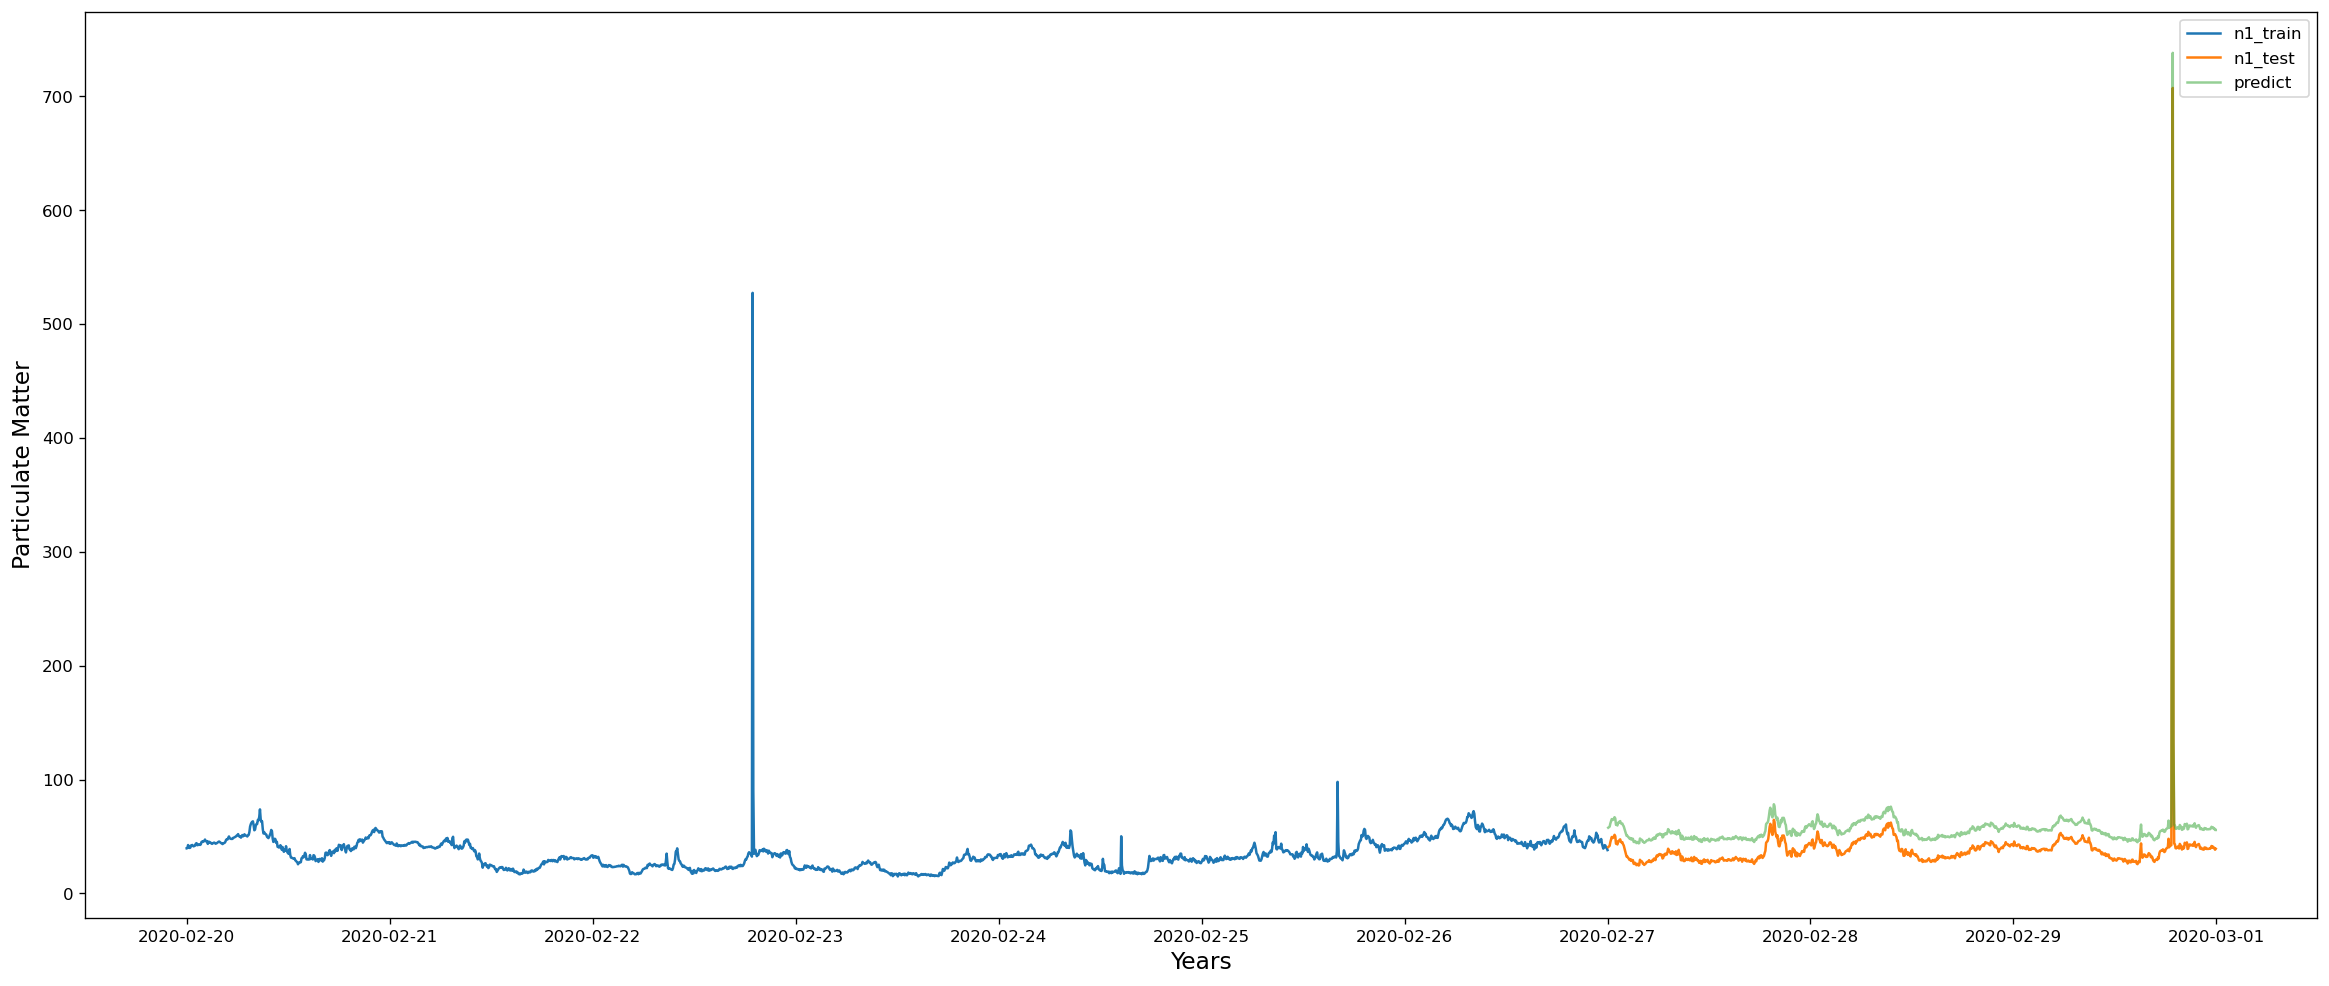

In [35]:
plt.figure(figsize=(24, 10), dpi=120)
plt.plot(train['p10'], label = 'n1_train')
plt.plot(test['p10'], label = 'n1_test')
plt.plot(pred['p10'], label='predict', alpha = 0.5)
plt.legend()
plt.xlabel('Years', fontsize=14)
plt.ylabel('Particulate Matter', fontsize=14)
plt.show()

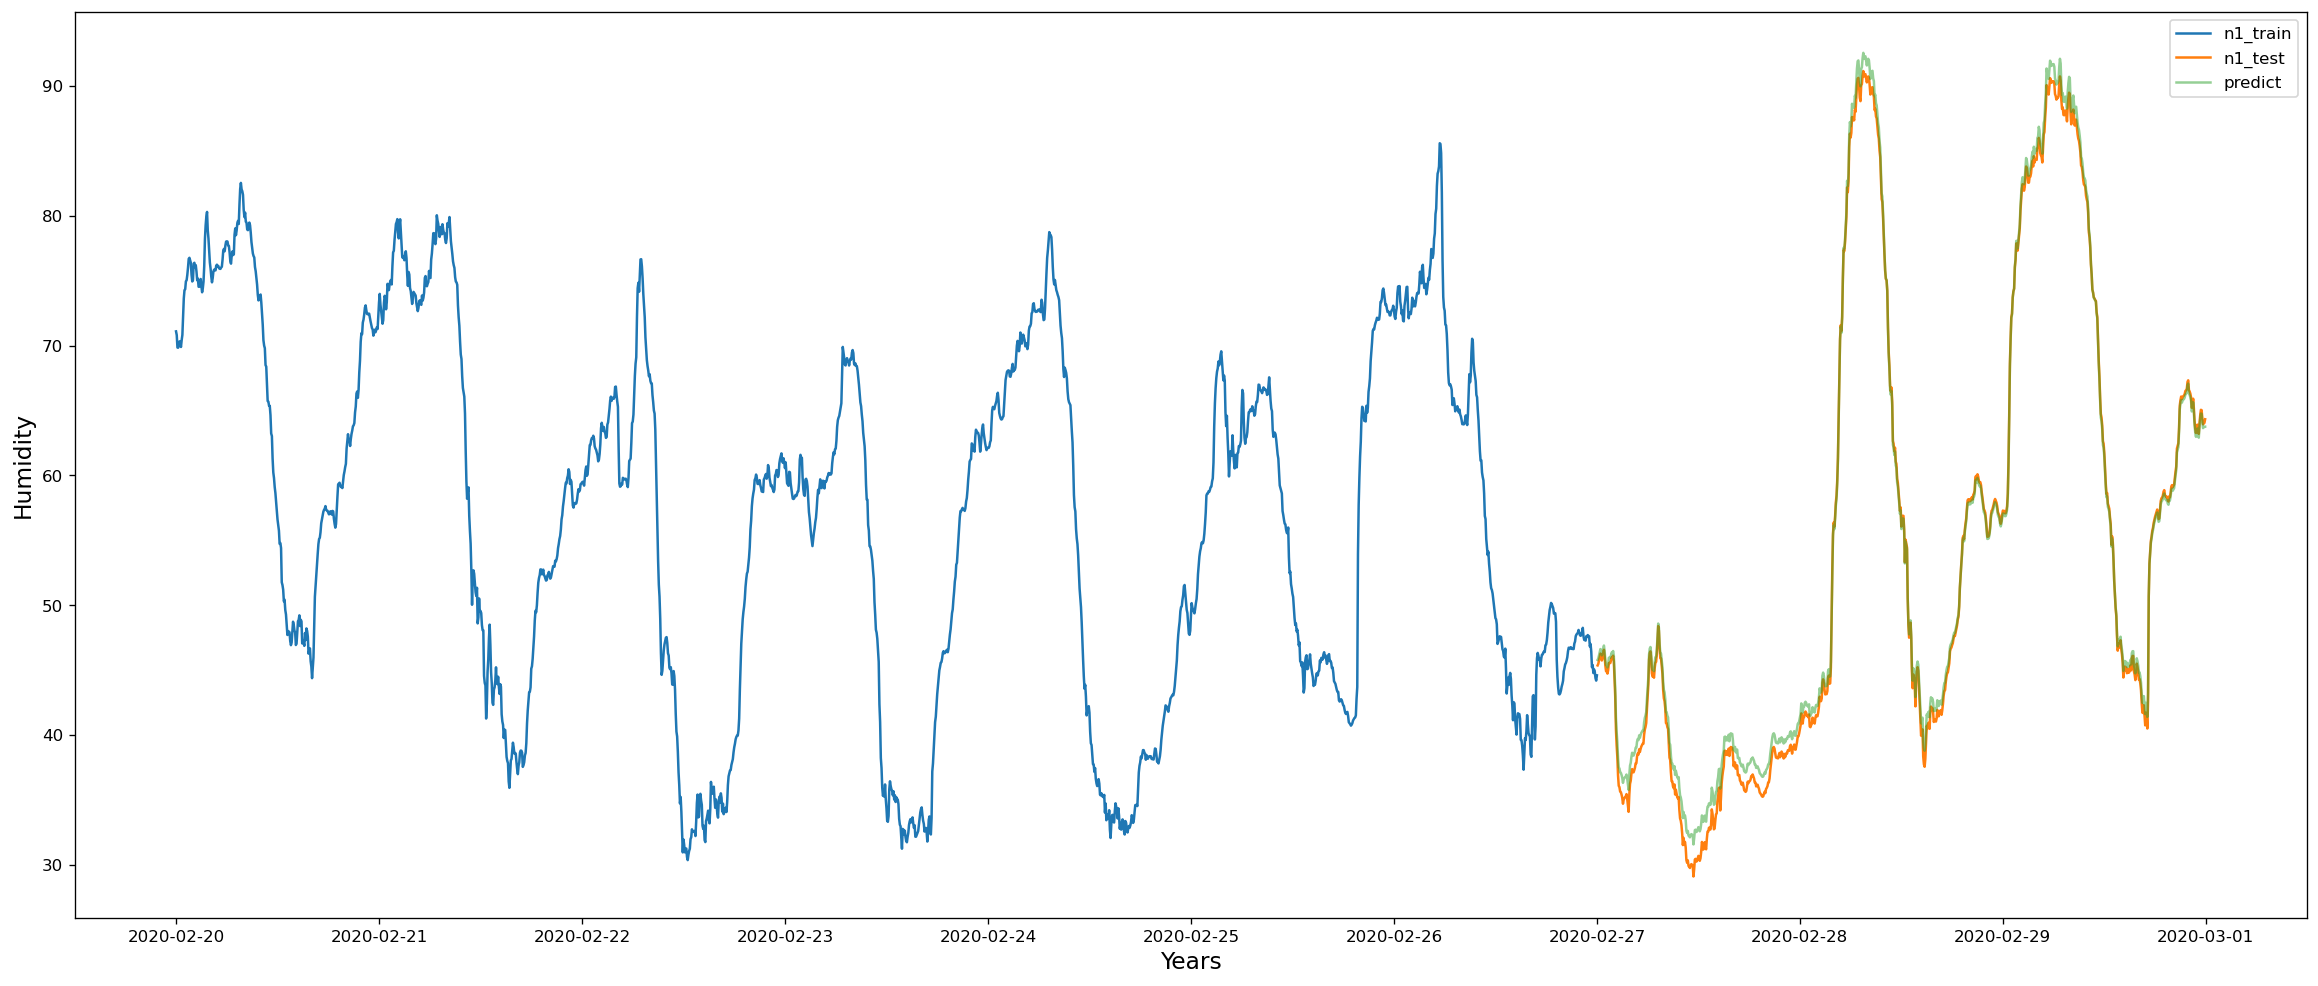

In [36]:
plt.figure(figsize=(24, 10), dpi=120)
plt.plot(train['hum'], label = 'n1_train')
plt.plot(test['hum'], label = 'n1_test')
plt.plot(pred['hum'], label='predict', alpha = 0.5)
plt.legend()
plt.xlabel('Years', fontsize=14)
plt.ylabel('Humidity', fontsize=14)
plt.show()